In [1]:
import cv2 as cv
import math
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
sift = cv.SIFT_create()
bf = cv.BFMatcher()

In [3]:
def SIFT_Gen(gray):
    kp, ds = sift.detectAndCompute(gray, None)
    res = cv.drawKeypoints(gray, kp, None)
    return res, kp, ds

In [4]:
def SIFT_KNNMatch(gray_1, kp_1, ds_1, gray_2, kp_2, ds_2):
    matches = bf.knnMatch(ds_1, ds_2, k = 2)
    
    good = []
    good_wo_list = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good.append([m])
            good_wo_list.append(m)
    res = cv.drawMatchesKnn(gray_1, kp_1, gray_2, kp_2, good, None, flags = 2)
    return res, good, good_wo_list

# Affine Transformation

In [5]:
img_ref = cv.imread("cereal.jpg")
img_ref = cv.cvtColor(img_ref, cv.COLOR_BGR2GRAY)

In [6]:
center = (round(img_ref.shape[1] / 2), round(img_ref.shape[0] / 2));

rot_deg = 10
scale = 0.5

rot_mat = cv.getRotationMatrix2D(center, rot_deg, scale)
img_tgt = cv.warpAffine(img_ref, rot_mat, (img_ref.shape[1], img_ref.shape[0]))

figure, ax = plt.subplots(1, 2)
ax[0].imshow(img_ref, cmap='gray')
ax[0].set_title("a) Reference image", y = -0.1)
ax[0].axis('off')
ax[1].imshow(img_tgt, cmap='gray')
ax[1].set_title("b) Target image", y = -0.1)
ax[1].axis('off')

(-0.5, 827.5, 1168.5, -0.5)

In [7]:
img_ref_kp, kp_ref, des_ref = SIFT_Gen(img_ref)
img_tgt_kp, kp_tgt, des_tgt = SIFT_Gen(img_tgt)

img_match, lr_match, lr_match_without_list = SIFT_KNNMatch(img_ref, kp_ref, des_ref, img_tgt, kp_tgt, des_tgt)

ref_pts = np.float32([kp_ref[m.queryIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)
tgt_pts = np.float32([kp_tgt[m.trainIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)

In [8]:
[tr_mat, inliers] = cv.estimateAffinePartial2D(ref_pts, tgt_pts)
img_ref_bgr = cv.imread("cereal.jpg")
img_ref_tr = cv.warpAffine(img_ref_bgr, tr_mat, (img_ref_bgr.shape[1], img_ref_bgr.shape[0]))

img_ref_tr = cv.cvtColor(img_ref_tr, cv.COLOR_BGR2RGB)
plt.imshow(img_ref_tr)
plt.axis("off")
plt.title("Overlaid Affine")

Text(0.5, 1.0, 'Overlaid Affine')

# Perspective Transformation

## Cereal_l

Text(0.5, 1.0, 'Cereal_l')

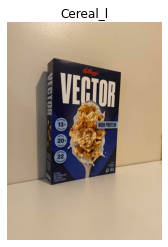

In [9]:
img_tgt = cv.imread("cereal_l.jpg")
img_tgt = cv.resize(img_tgt, (img_ref.shape[1], img_ref.shape[0]))
img_tgt_copy = img_tgt.copy()
img_tgt = cv.cvtColor(img_tgt, cv.COLOR_BGR2GRAY)
img_tgt_copy = cv.cvtColor(img_tgt_copy, cv.COLOR_BGR2RGB)
plt.imshow(img_tgt_copy)
plt.axis("off")
plt.title("Cereal_l")

In [10]:
img_ref_kp, kp_ref, des_ref = SIFT_Gen(img_ref)
img_tgt_kp, kp_tgt, des_tgt = SIFT_Gen(img_tgt)

img_match, lr_match, lr_match_without_list = SIFT_KNNMatch(img_ref, kp_ref, des_ref, img_tgt, kp_tgt, des_tgt)

ref_pts = np.float32([kp_ref[m.queryIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)
tgt_pts = np.float32([kp_tgt[m.trainIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)

In [11]:
tr_mat, mask = cv.findHomography(ref_pts, tgt_pts, method = cv.RANSAC)
img_ref_tr = cv.warpPerspective(img_ref_bgr, tr_mat, (img_ref.shape[1], img_ref.shape[0]))

img_ref_tr = cv.cvtColor(img_ref_tr, cv.COLOR_BGR2RGB)
plt.imshow(img_ref_tr)
plt.axis("off")
plt.title("Overlay from recovered homography")

Text(0.5, 1.0, 'Overlay from recovered homography')

## Cereal_r

Text(0.5, 1.0, 'Cereal_r')

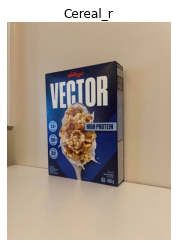

In [12]:
img_tgt = cv.imread("cereal_r.jpg")
img_tgt_copy = img_tgt.copy()
img_tgt = cv.cvtColor(img_tgt, cv.COLOR_BGR2GRAY)
img_tgt_copy = cv.cvtColor(img_tgt_copy, cv.COLOR_BGR2RGB)
plt.imshow(img_tgt_copy)
plt.axis("off")
plt.title("Cereal_r")

In [13]:
img_ref_kp, kp_ref, des_ref = SIFT_Gen(img_ref)
img_tgt_kp, kp_tgt, des_tgt = SIFT_Gen(img_tgt)

img_match, lr_match, lr_match_without_list = SIFT_KNNMatch(img_ref, kp_ref, des_ref, img_tgt, kp_tgt, des_tgt)

ref_pts = np.float32([kp_ref[m.queryIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)
tgt_pts = np.float32([kp_tgt[m.trainIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)

Text(0.5, 1.0, 'Overlay from recovered homography')

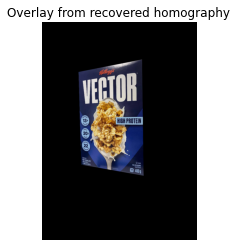

In [14]:
[tr_mat, mask] = cv.findHomography(ref_pts, tgt_pts, method = cv.RANSAC)
img_ref_tr = cv.warpPerspective(img_ref_bgr, tr_mat, (img_ref_bgr.shape[1], img_ref_bgr.shape[0]))

img_ref_tr = cv.cvtColor(img_ref_tr, cv.COLOR_BGR2RGB)
plt.imshow(img_ref_tr)
plt.axis("off")
plt.title("Overlay from recovered homography")

## Cereal_tl

Text(0.5, 1.0, 'Cereal_tl')

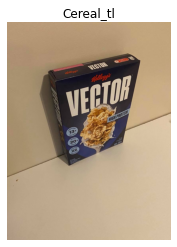

In [15]:
img_tgt = cv.imread("cereal_tl.jpg")
img_tgt_copy = img_tgt.copy()
img_tgt = cv.cvtColor(img_tgt, cv.COLOR_BGR2GRAY)
img_tgt_copy = cv.cvtColor(img_tgt_copy, cv.COLOR_BGR2RGB)
plt.imshow(img_tgt_copy)
plt.axis("off")
plt.title("Cereal_tl")

In [16]:
img_ref_kp, kp_ref, des_ref = SIFT_Gen(img_ref)
img_tgt_kp, kp_tgt, des_tgt = SIFT_Gen(img_tgt)

img_match, lr_match, lr_match_without_list = SIFT_KNNMatch(img_ref, kp_ref, des_ref, img_tgt, kp_tgt, des_tgt)
plt.imshow(img_match)

ref_pts = np.float32([kp_ref[m.queryIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)
tgt_pts = np.float32([kp_tgt[m.trainIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)

In [17]:
[tr_mat, mask] = cv.findHomography(ref_pts, tgt_pts, method = cv.RANSAC)
img_ref_tr = cv.warpPerspective(img_ref_bgr, tr_mat, (img_ref_bgr.shape[1], img_ref_bgr.shape[0]))

img_ref_tr = cv.cvtColor(img_ref_tr, cv.COLOR_BGR2RGB)
plt.imshow(img_ref_tr)
plt.axis("off")
plt.title("Overlay from recovered homography")

Text(0.5, 1.0, 'Overlay from recovered homography')

## Cereal_tr

Text(0.5, 1.0, 'Cereal_tr')

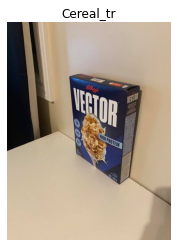

In [18]:
img_tgt = cv.imread("cereal_tr.jpg")
img_tgt_copy = img_tgt.copy()
img_tgt = cv.cvtColor(img_tgt, cv.COLOR_BGR2GRAY)
img_tgt_copy = cv.cvtColor(img_tgt_copy, cv.COLOR_BGR2RGB)
plt.imshow(img_tgt_copy)
plt.axis("off")
plt.title("Cereal_tr")

In [19]:
img_ref_kp, kp_ref, des_ref = SIFT_Gen(img_ref)
img_tgt_kp, kp_tgt, des_tgt = SIFT_Gen(img_tgt)

img_match, lr_match, lr_match_without_list = SIFT_KNNMatch(img_ref, kp_ref, des_ref, img_tgt, kp_tgt, des_tgt)

ref_pts = np.float32([kp_ref[m.queryIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)
tgt_pts = np.float32([kp_tgt[m.trainIdx].pt for m in lr_match_without_list]).reshape(-1, 1, 2)

In [20]:
[tr_mat, mask] = cv.findHomography(ref_pts, tgt_pts, method = cv.RANSAC)
img_ref_tr = cv.warpPerspective(img_ref_bgr, tr_mat, (img_ref_bgr.shape[1], img_ref_bgr.shape[0]))

img_ref_tr = cv.cvtColor(img_ref_tr, cv.COLOR_BGR2RGB)
plt.imshow(img_ref_tr)
plt.axis("off")
plt.title("Overlay from recovered homography")

Text(0.5, 1.0, 'Overlay from recovered homography')